In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam,rmsprop,SGD
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [15]:
def create_model(learning_rate, num_dense_layers,
                 num_dense_nodes, num_features):
# create model
    model = Sequential()
    
    model.add(Dense(num_features, activation='relu',kernel_initializer='random_uniform'))
    
    
    for i in range(num_dense_layers):
        # Name of the layer. This is not really necessary
        # because Keras should give them unique names.
        name = 'layer_dense_{0}'.format(i+1)

        # Add the dense / fully-connected layer to the model.
        # This has two hyper-parameters we want to optimize:
        # The number of nodes and the activation function.
        model.add(Dense(num_dense_nodes,
                        activation='relu',
                       name=name))
        
    model.add(Dense(1,activation='relu'))
    
    
    #Optimizer = SGD(lr=learning_rate, momentum=0.3, decay=0)
    #Optimizer=adam(lr=learning_rate,beta_1=0.98,beta_2=0.58)
    #Optimizer=rmsprop(lr=learning_rate,rho=0.90)
    # Compile model
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse'])
    
    
    return model

In [16]:
train_data=pd.read_csv('data-files/train_data.csv')
train_data.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
test_data=pd.read_csv('data-files/Season_2019.csv')
test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
train_data=train_data[['Player','MPG','PER','VORP','BPM','OBPM','WS','OWS','DWS','Fantasy_PPG']]
test_data=test_data[['Player','MPG','PER','VORP','BPM','OBPM','WS','OWS','DWS']]

In [19]:
x=train_data[['MPG','PER','VORP','BPM','OBPM','WS','OWS','DWS']]
y=train_data['Fantasy_PPG']

In [20]:
x=np.asarray(x)
y=np.asarray(y).reshape(len(y),1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.3)

In [23]:
model=create_model(learning_rate=0.40,num_dense_layers=10,num_dense_nodes=200,num_features=len(x[0]))

In [24]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)

In [25]:
history=model.fit(x=x_train.astype(float),y=y_train.astype(float),batch_size=30, epochs=100,callbacks=[es])

Epoch 1/100
6946/6946 [==============================] - 2s 254us/step - loss: 22.3896 - mean_squared_error: 22.3896
Epoch 2/100
6946/6946 [==============================] - 1s 157us/step - loss: 4.6974 - mean_squared_error: 4.6974
Epoch 3/100
6946/6946 [==============================] - 1s 151us/step - loss: 2.5324 - mean_squared_error: 2.5324
Epoch 4/100
6946/6946 [==============================] - 1s 151us/step - loss: 3.0185 - mean_squared_error: 3.0185
Epoch 5/100
6946/6946 [==============================] - 1s 152us/step - loss: 2.1218 - mean_squared_error: 2.1218
Epoch 6/100
6946/6946 [==============================] - 1s 152us/step - loss: 2.2542 - mean_squared_error: 2.2542
Epoch 7/100
6946/6946 [==============================] - 1s 153us/step - loss: 2.2199 - mean_squared_error: 2.2199
Epoch 8/100
6946/6946 [==============================] - 1s 153us/step - loss: 2.3637 - mean_squared_error: 2.3637
Epoch 9/100
6946/6946 [==============================] - 1s 157us/step - loss:

6946/6946 [==============================] - 1s 157us/step - loss: 1.7604 - mean_squared_error: 1.7604
Epoch 72/100
6946/6946 [==============================] - 1s 155us/step - loss: 1.6842 - mean_squared_error: 1.6842
Epoch 73/100
6946/6946 [==============================] - 1s 156us/step - loss: 1.8881 - mean_squared_error: 1.8881
Epoch 74/100
6946/6946 [==============================] - 1s 162us/step - loss: 1.7394 - mean_squared_error: 1.7394
Epoch 75/100
6946/6946 [==============================] - 1s 174us/step - loss: 1.7308 - mean_squared_error: 1.7308
Epoch 76/100
6946/6946 [==============================] - 1s 164us/step - loss: 1.7859 - mean_squared_error: 1.7859
Epoch 77/100
6946/6946 [==============================] - 1s 164us/step - loss: 1.5852 - mean_squared_error: 1.5852
Epoch 78/100
6946/6946 [==============================] - 1s 160us/step - loss: 1.5666 - mean_squared_error: 1.5666
Epoch 79/100
6946/6946 [==============================] - 1s 156us/step - loss: 1.636

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean-Squared-Error')

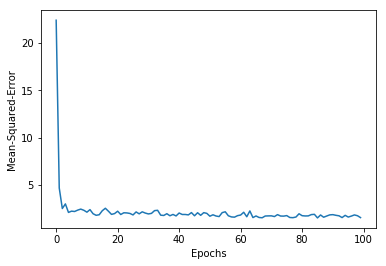

In [27]:
plt.plot(history.history['mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean-Squared-Error')

In [28]:
np.mean(np.abs(model.predict(x_test.astype(float))-y_test.astype(float)))

0.8638920342813059

In [29]:
test_data.index=test_data['Player']
test_data.drop('Player',axis=1,inplace=True)
predictions=pd.DataFrame(index=test_data.index,data=model.predict(test_data))

In [30]:
predictions.sort_values(0,ascending=False,inplace=True)
predictions.rename(columns={0: 'Fantasy_PPG_Prediction'},inplace=True)

In [32]:
predictions.to_csv('data-files/2018_2019_Predictions.csv')

In [33]:
model_json=model.to_json()

with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

print("Saved to disk")

Saved to disk
